In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# (Optional) Evaluate the model on the validation set
import sklearn.metrics as metrics 
import warnings
warnings.filterwarnings("ignore")

# Metrics

In [162]:
models_list = pd.DataFrame()

In [163]:
df = pd.read_pickle('df_model.pkl')
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_genre_edm,...,playlist_genre_rap,playlist_genre_rock,key,feat,remix,me,release_year,release_month,duration_s,track_popularity
0,0.682,0.401,-10.068,0.023600,0.279000,0.011700,0.0887,0.566,97.091,0,...,0,1,2,0,0,0,2001,1,235.440,41
1,0.582,0.704,-6.242,0.034700,0.065100,0.000000,0.2120,0.698,150.863,0,...,0,0,5,0,0,0,2018,1,197.286,15
2,0.303,0.880,-4.739,0.044200,0.011700,0.009940,0.3470,0.404,135.225,0,...,0,1,9,0,0,0,2017,11,373.512,28
3,0.659,0.794,-5.644,0.054000,0.000761,0.132000,0.3220,0.852,128.041,0,...,0,0,10,0,0,0,2015,8,228.565,24
4,0.662,0.838,-6.300,0.049900,0.114000,0.000697,0.0881,0.496,129.884,0,...,0,0,1,0,0,0,2018,11,236.308,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,0.744,0.715,-6.103,0.095543,0.101000,0.000000,0.0919,0.340,154.962,0,...,0,0,0,0,0,0,2017,2,179.773,72
28352,0.832,0.666,-4.920,0.063300,0.143000,0.000000,0.0720,0.810,109.536,0,...,0,0,1,0,0,0,2010,10,223.890,36
28353,0.963,0.603,-6.224,0.180000,0.067300,0.000006,0.2140,0.647,129.990,0,...,0,0,2,0,0,0,2014,12,260.240,49
28354,0.458,0.540,-6.457,0.027000,0.237360,0.000428,0.1150,0.657,142.218,0,...,0,0,5,0,0,0,2013,7,191.205,40


In [164]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_genre_edm,...,playlist_genre_rap,playlist_genre_rock,key,feat,remix,me,release_year,release_month,duration_s,track_popularity
0,0.682,0.401,-10.068,0.0236,0.279000,0.011700,0.0887,0.566,97.091,0,...,0,1,2,0,0,0,2001,1,235.440,41
1,0.582,0.704,-6.242,0.0347,0.065100,0.000000,0.2120,0.698,150.863,0,...,0,0,5,0,0,0,2018,1,197.286,15
2,0.303,0.880,-4.739,0.0442,0.011700,0.009940,0.3470,0.404,135.225,0,...,0,1,9,0,0,0,2017,11,373.512,28
3,0.659,0.794,-5.644,0.0540,0.000761,0.132000,0.3220,0.852,128.041,0,...,0,0,10,0,0,0,2015,8,228.565,24
4,0.662,0.838,-6.300,0.0499,0.114000,0.000697,0.0881,0.496,129.884,0,...,0,0,1,0,0,0,2018,11,236.308,38


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,28356.0,0.656844,0.139753,0.263000,0.5650,0.670000,0.760000,0.983
energy,28356.0,0.702125,0.176692,0.183000,0.5830,0.722000,0.843000,1.000
loudness,28356.0,-6.612514,2.569864,-13.703000,-8.2160,-6.252000,-4.705750,0.642
speechiness,28356.0,0.081577,0.056356,0.000000,0.0410,0.061800,0.098919,0.271
acousticness,28356.0,0.140554,0.154785,-0.021035,0.0143,0.079300,0.226373,0.628
instrumentalness,28356.0,0.091117,0.232548,0.000000,0.0000,0.000021,0.006570,0.994
liveness,28356.0,0.190958,0.155894,0.000000,0.0926,0.127000,0.249000,0.996
valence,28356.0,0.510387,0.234340,0.000000,0.3290,0.512000,0.695000,0.991
tempo,28356.0,120.956180,26.954560,0.000000,99.9720,121.993000,133.999000,239.440
playlist_genre_edm,28356.0,0.195267,0.396413,0.000000,0.0000,0.000000,0.000000,1.000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          28356 non-null  float64
 1   energy                28356 non-null  float64
 2   loudness              28356 non-null  float64
 3   speechiness           28356 non-null  float64
 4   acousticness          28356 non-null  float64
 5   instrumentalness      28356 non-null  float64
 6   liveness              28356 non-null  float64
 7   valence               28356 non-null  float64
 8   tempo                 28356 non-null  float64
 9   playlist_genre_edm    28356 non-null  int64  
 10  playlist_genre_latin  28356 non-null  int64  
 11  playlist_genre_pop    28356 non-null  int64  
 12  playlist_genre_r&b    28356 non-null  int64  
 13  playlist_genre_rap    28356 non-null  int64  
 14  playlist_genre_rock   28356 non-null  int64  
 15  key                

<Axes: xlabel='track_popularity', ylabel='Density'>

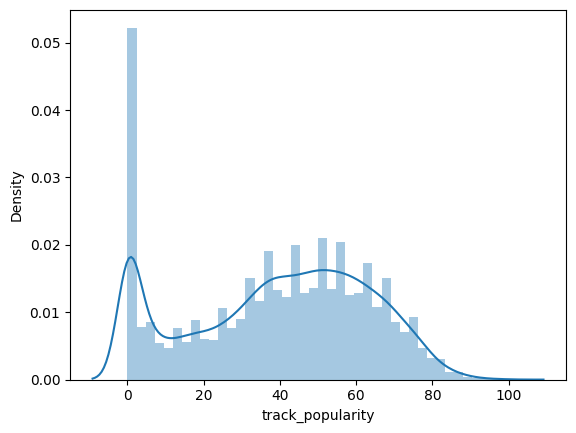

In [167]:
sns.distplot(df.track_popularity)

Creating  a Linear regression  model with depenant value 'track_popularity' 

In [169]:
df['track_popularity'].max()

100

In [170]:
y = df.track_popularity
X = df.drop(columns=['track_popularity'])

# Create and Train the Model

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
# Split into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split train+val into train and val sets (75% train, 25% val from the train+val set)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Regression Models

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

### Linear Regression

In [177]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Use X_train and y_train

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [178]:
# define the function regressionMetrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def regressionMetrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [179]:
regressionMetrics(y_val, y_val_pred)

{'MAE': 18.443236023285436,
 'MSE': 488.87327489933466,
 'RMSE': 22.11047884825959,
 'R2': 0.1290618648585693}

In [180]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,18.443236,488.873275,22.110479,0.129062


<Axes: xlabel='track_popularity'>

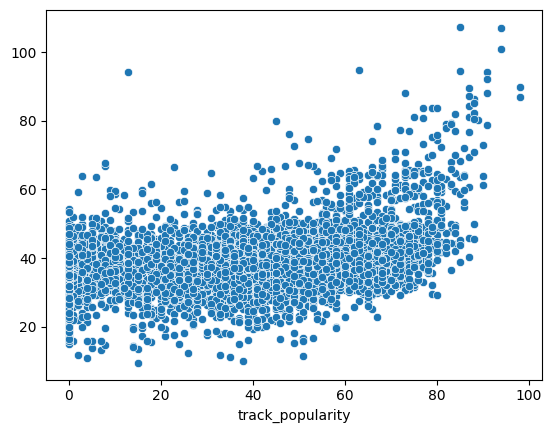

In [181]:
sns.scatterplot(x=y_val, y=y_val_pred)

### Decision Tree

In [183]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred2 = mod2.predict(X_val)

In [184]:
regressionMetrics(y_val, y_val_pred2)

{'MAE': 23.282049021336626,
 'MSE': 906.0678451772175,
 'RMSE': 30.100960868005817,
 'R2': -0.6141791337494409}

In [185]:
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MAE,MSE,RMSE,R2
0,Linear Regression,18.443236,488.873275,22.110479,0.129062
1,Decision Tree,23.282049,906.067845,30.100961,-0.614179


<Axes: xlabel='track_popularity'>

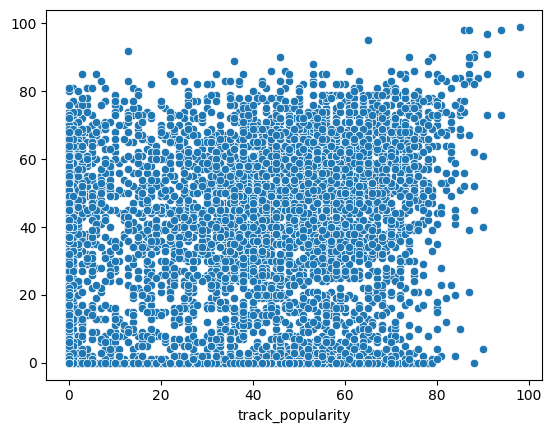

In [186]:
sns.scatterplot(x=y_val, y=y_val_pred2)

### Random Forest


In [188]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred3 = mod3.predict(X_val)

In [189]:
regressionMetrics(y_val, y_val_pred3)

{'MAE': 17.558100714999455,
 'MSE': 456.4357352222455,
 'RMSE': 21.364356653600538,
 'R2': 0.18685003157878421}

In [190]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,18.443236,488.873275,22.110479,0.129062
1,Decision Tree,23.282049,906.067845,30.100961,-0.614179
2,RandomForest,17.558101,456.435735,21.364357,0.186850


<Axes: xlabel='track_popularity'>

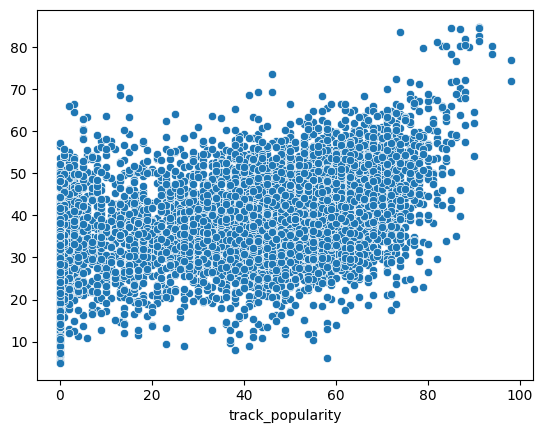

In [191]:
sns.scatterplot(x=y_val, y=y_val_pred3)

### Adaptive Boosting (ADABoost)

In [193]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [194]:
# Make predictions on the validation set
y_val_pred4 = mod4.predict(X_val)

In [195]:
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,18.443236,488.873275,22.110479,0.129062
1,Decision Tree,23.282049,906.067845,30.100961,-0.614179
2,RandomForest,17.558101,456.435735,21.364357,0.186850
3,ADABoost,18.937882,494.438816,22.235980,0.119147


<Axes: xlabel='track_popularity'>

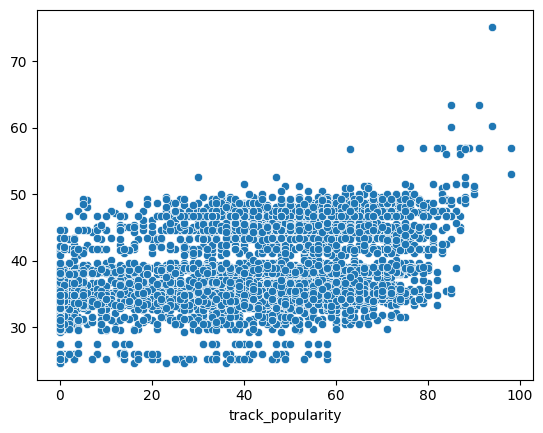

In [196]:
sns.scatterplot(x=y_val, y=y_val_pred4)

### Gradient Boosting Machine (GBM)

In [198]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [199]:
# Make predictions on the validation set
y_val_pred5 = mod5.predict(X_val)

In [200]:
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,18.443236,488.873275,22.110479,0.129062
1,Decision Tree,23.282049,906.067845,30.100961,-0.614179
2,RandomForest,17.558101,456.435735,21.364357,0.186850
3,ADABoost,18.937882,494.438816,22.235980,0.119147
4,GBM,17.707548,449.128426,21.192650,0.199868


<Axes: xlabel='track_popularity'>

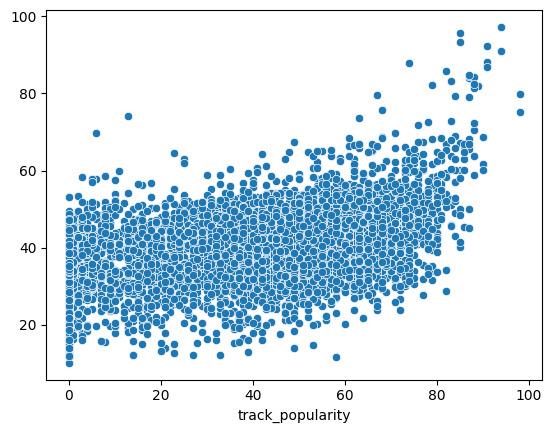

In [201]:
sns.scatterplot(x=y_val, y=y_val_pred5)

### Support Vector Machine (SVM)

In [203]:
mod6 = SVR()
mod6.fit(X_train, y_train)
# Make predictions on the validation set 
y_val_pred6 = mod6.predict(X_val)

In [204]:
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MAE,MSE,RMSE,R2
0,Linear Regression,18.443236,488.873275,22.110479,0.129062
1,Decision Tree,23.282049,906.067845,30.100961,-0.614179
2,RandomForest,17.558101,456.435735,21.364357,0.186850
3,ADABoost,18.937882,494.438816,22.235980,0.119147
4,GBM,17.707548,449.128426,21.192650,0.199868
5,SVM,19.542172,559.651433,23.656953,0.002969


<Axes: xlabel='track_popularity'>

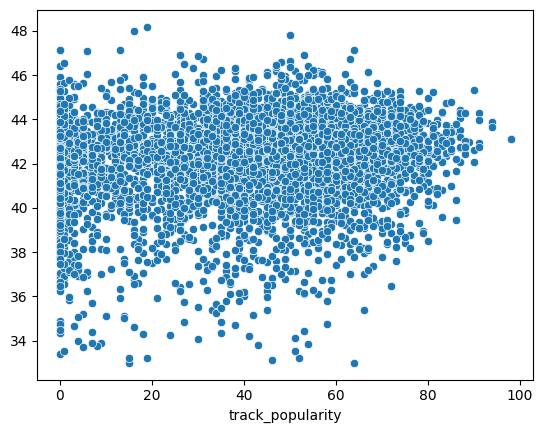

In [205]:
sns.scatterplot(x=y_val, y=y_val_pred6)

### XGBoost Regressor

In [207]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred7 = mod7.predict(X_val)

In [208]:
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MAE,MSE,RMSE,R2
0,Linear Regression,18.443236,488.873275,22.110479,0.129062
1,Decision Tree,23.282049,906.067845,30.100961,-0.614179
2,RandomForest,17.558101,456.435735,21.364357,0.186850
3,ADABoost,18.937882,494.438816,22.235980,0.119147
4,GBM,17.707548,449.128426,21.192650,0.199868
5,SVM,19.542172,559.651433,23.656953,0.002969
6,XGB,17.743590,471.236055,21.707972,0.160483


<Axes: xlabel='track_popularity'>

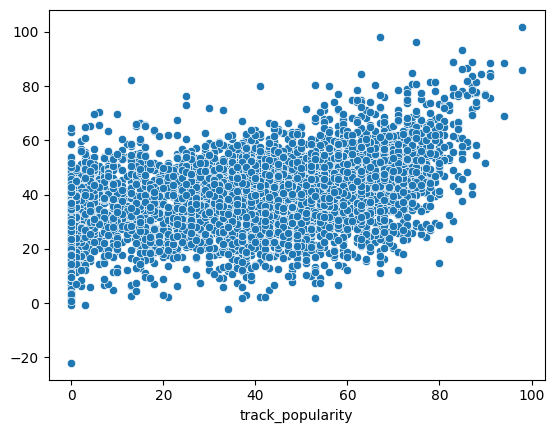

In [209]:
sns.scatterplot(x=y_val, y=y_val_pred7)

In [210]:
## Model Selection

Metrics:<br><b>MSE</b> - Mean Squared Error<br><b>RMSE</b> Root Mean Squared Error<br><b>MAE </b>Mean Absolute Error Calculates the average of the absolute differences between predicted and actual values.<br>
<b>RMSLE</b> Root Mean Squared Logarithmic Error

In [212]:
models_list.sort_values('MAE')

,model,MAE,MSE,RMSE,R2
2,RandomForest,17.558101,456.435735,21.364357,0.186850
4,GBM,17.707548,449.128426,21.192650,0.199868
6,XGB,17.743590,471.236055,21.707972,0.160483
0,Linear Regression,18.443236,488.873275,22.110479,0.129062
3,ADABoost,18.937882,494.438816,22.235980,0.119147
5,SVM,19.542172,559.651433,23.656953,0.002969
1,Decision Tree,23.282049,906.067845,30.100961,-0.614179


# Hyperparameters and Finetuning

In [214]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


# Random Search: we decide which parameters and how (randomly)

In [216]:
# Reduced number of options for each hyperparameter
n_estimators = [100, 200, 300]  # Fewer values for the number of trees
max_features = ['auto','sqrt']  #  # Number of features to consider at each split
max_depth = [10, 20, 30, 40, None]  # Fewer values for max depth
min_samples_split = [2, 5, 10]  # Keep essential options only
min_samples_leaf = [1, 2, 4]  # Reduced options for leaf samples
bootstrap = [True, False]  # Keep as is

# Create a lighter random grid
lighter_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(lighter_grid)

# Reduced number of iterations and cross-validation folds
rf_random = RandomizedSearchCV(estimator=mod3, param_distributions=lighter_grid, n_iter=25, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [217]:
# Best hyperparameters found
print("Best Parameters:\n", rf_random.best_params_)

# Best estimator
best_model = rf_random.best_estimator_

# Evaluate on test set
evaluate(best_model, X_test, y_test)



Best Parameters:
 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Model Performance
Mean Absolute Error: 17.3884
Root Mean Squared Error: 21.0440
R-squared (R²): 0.1966


17.388394348979332

In [218]:
# we check the best parameter vs. test (not valid)

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mae = np.mean(errors)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(np.mean(errors)))
    print('Root Mean Squared Error: {:0.4f}'.format(rmse))
    print('R-squared (R²): {:0.4f}'.format(r2))
    
    return mae

### Running base Model

In [220]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 4)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Mean Absolute Error: 17.4309
Root Mean Squared Error: 21.3110
R-squared (R²): 0.1760


### Comparisson

In [222]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Improvement of 0.24%.


## Conclusion 